### Student Information
Name: Alejandro Cortés

Student ID: 110065429

GitHub ID: alexcortes18

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

# First Section: Take Home Exercises

In [4]:
#The following lines from the lab are put here to have the same dataset and to be able to do the take away exercises:

In [5]:
%reload_ext autoreload
%autoreload 2

In [6]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [7]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [8]:
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [9]:
#arrive to the same original dataset needed for Homework Exercise 2
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X[::10][0:10]

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
10,From: anasaz!karl@anasazi.com (Karl Dussik) Su...,3,soc.religion.christian
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,3,soc.religion.christian
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,2,sci.med
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,3,soc.religion.christian
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,1,comp.graphics
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,0,alt.atheism
70,From: weaver@chdasic.sps.mot.com (Dave Weaver)...,3,soc.religion.christian
80,From: annick@cortex.physiol.su.oz.au (Annick A...,2,sci.med
90,Subject: Vonnegut/atheism From: dmn@kepler.unh...,0,alt.atheism


### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [38]:
#Answer here
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [39]:
X.query('category > index')
#Here i query to show where the Category is greater than the index. If more columns had numbers i could compare them too..
#We can use .query() method directly with columns:

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian


In [40]:
#Also can use the .query() method with comparison with values of 1 column, to filter it:
X.query('category_name == "sci.med"')

,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
16,"From: texx@ossi.com (Robert ""Texx"" Woodworth) ...",2,sci.med
28,From: rind@enterprise.bih.harvard.edu (David R...,2,sci.med
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


In [41]:
#Swap the column values of Category and Category Names and print some examples:
#new dataframe to test the swapping so as to not affect the original dataframe.
Z = X.copy()

In [42]:
Z.loc[:,['category','category_name']] = Z[['category_name','category']].to_numpy()

In [13]:
print('Normal Category and Category_Name columns:\n')
print(X[['category_name','category']][0:10])

print('\n')

print('Reversed Category and Category_Name columns:\n')
print(Z[['category_name','category']][0:10])

Normal Category and Category_Name columns:

            category_name  category
0           comp.graphics         1
1           comp.graphics         1
2  soc.religion.christian         3
3  soc.religion.christian         3
4  soc.religion.christian         3
5  soc.religion.christian         3
6  soc.religion.christian         3
7                 sci.med         2
8                 sci.med         2
9                 sci.med         2


Reversed Category and Category_Name columns:

            category_name  category
0           comp.graphics         1
1           comp.graphics         1
2  soc.religion.christian         3
3  soc.religion.christian         3
4  soc.religion.christian         3
5  soc.religion.christian         3
6  soc.religion.christian         3
7                 sci.med         2
8                 sci.med         2
9                 sci.med         2


In [14]:
#here i am querying a cross section or the first row by just using .loc[0], which is equivalent to X.xs(0)
print(X.loc[0])
print('\n')
X.xs(0)

text             From: sd345@city.ac.uk (Michael Collier) Subje...
category                                                         1
category_name                                        comp.graphics
Name: 0, dtype: object




text             From: sd345@city.ac.uk (Michael Collier) Subje...
category                                                         1
category_name                                        comp.graphics
Name: 0, dtype: object

In [15]:
#Enlarging the dataframe in the column section with a copy of category:
#make a copy first:

X_enlarged = X.copy()

X_enlarged.loc[:,'Category_Name Copy'] = X_enlarged.loc[:,'category_name']
#also appending but in the row:
X_enlarged.loc[len(X_enlarged)] = ['Hello',1,'comp.graphics','comp.graphics']
X_enlarged

,text,category,category_name,Category_Name Copy
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,soc.religion.christian
...,...,...,...,...
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med,sci.med
2256,From: dyer@spdcc.com (Steve Dyer) Subject: Re:...,2,sci.med,sci.med


In [16]:
#we can also query using iat or at, to find 1 specific value on the matrix/table:

#querying based on 'coordinates' in the table:
print(X.iat[3,2],'\n')

#Querying based on the row index + specific column
print(X.at[0,'category_name'],'\n')
print(X.loc[0].at['category_name'])

soc.religion.christian 

comp.graphics 

comp.graphics


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [12]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [13]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [14]:
# Answer here
# 0)np.nan is a placeholder to represent there is a missing value, so the resulting isnull() returns true, because we are
# assigning an empty placeholder in that position.
# 1) only the column id was filled, there isn't even a column for "missing example", so of course we will have a True return value for isnull().
# 2) and 3) are strings, so there are values filled in those positions, so the results for isnull() here is false for both, since we do have values.
# 4) None keyword is another way to express we have a missing value, but this time it refers to an object, not a float like np.nan. Still it is a missing value, so isnull() returns true.
# 5) '' is a string even though it has no characters in it. So we are assigning some memory to 'missing example', just that it is an empty string, but not a missing value, so isnull() returns false.

### 5.1 Sampling
I copied these lines to be able to have the data to compare and answer Exercise 6.

In [47]:
X_sample = X.sample(n=1000,random_state= 42) #random state
print(len(X_sample))
X_sample[0:10]

1000


,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
535,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
809,From: JEK@cu.nih.gov Subject: Thinking about h...,3,soc.religion.christian
2002,From: asket@acad2.alaska.edu Subject: When is ...,3,soc.religion.christian
2166,Subject: XLib and 24 Bit Displays [Info Needed...,1,comp.graphics
1272,From: wcsbeau@alfred.carleton.ca (OPIRG) Subje...,2,sci.med


### >>> Exercise 6 (take home):
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [48]:
# Answer here
# In regards of the information in each individual record, nothing has change. What we did when we applied X.sample(n=1000)
# was to select 1000 random records (or complete rows) and add or append them to the new X_sample dataframe without
# resetting the index, instead, keeping the original index of the X dataframe. So for example, the X_sample now has as its
# first record (random_state was applied for reproducibility) or row with index value of 561, second record of 
# index value 440, and so on with random values.


X_sample

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med
440,From: jkellett@netcom.com (Joe Kellett) Subjec...,3,soc.religion.christian
1513,From: noring@netcom.com (Jon Noring) Subject: ...,2,sci.med
1360,From: fraseraj@dcs.glasgow.ac.uk (Andrew J Fra...,3,soc.religion.christian
259,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1316,From: salaris@niblick.ecn.purdue.edu (Rrrrrrrr...,3,soc.religion.christian
592,From: sandvik@newton.apple.com (Kent Sandvik) ...,0,alt.atheism
1965,From: uad1126@tdc.dircon.co.uk (Robert Palmer)...,3,soc.religion.christian
363,From: mdpyssc@fs1.mcc.ac.uk (Sue Cunningham) S...,1,comp.graphics


In [49]:
# If we query the first element or row, we get the first added or appended random element from the original X dataframe
# (with it's original index value).
# Obviously the next change we have in the new dataframe is the number of records or rows (1000) which differentiate from
# the original database with 2257 records. The order of the columns stayed the same.
X_sample[0:1]

,text,category,category_name
561,From: ray@engr.LaTech.edu (Bill Ray) Subject: ...,2,sci.med


In [50]:
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

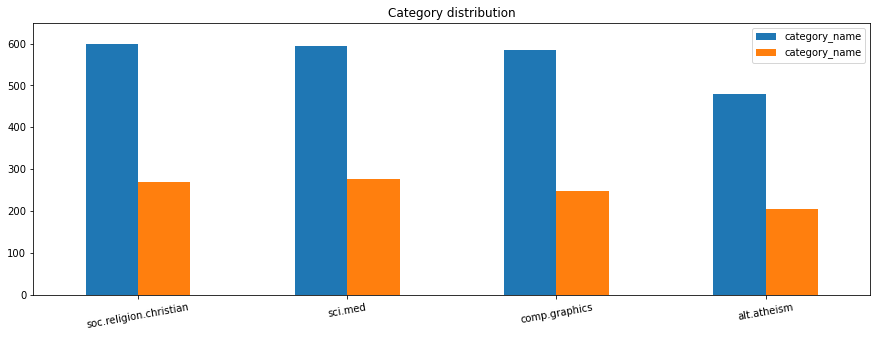

In [51]:
#Find the upper bounds of boths DataFrames
upper_bound_X = max(X.category_name.value_counts()) + 50
upper_bound_X_sample = max(X_sample.category_name.value_counts()) + 50
upper_bound = 0

if upper_bound_X > upper_bound_X_sample:
    upper_bound = upper_bound_X
else:
    upper_bound = upper_bound_X_sample

#Concatenate both Dataframes, and plot the result:

result_combined_df = pd.concat([X.category_name.value_counts(),
                                X_sample.category_name.value_counts()], axis=1).plot(kind = 'bar',
                                                                                     title = 'Category distribution',
                                                                                     ylim = [0, upper_bound],        
                                                                                     rot = 10, fontsize = 10, figsize = (15,5))

In [52]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [53]:
# Answer here

array = X_counts[4:5,0:100].toarray()

words =[]

for i in range(array.shape[1]):
    if(array[0][i] ==1):
        words.append(count_vect.get_feature_names()[i])
        print("Word/Term is: ",count_vect.get_feature_names()[i], " with position: ",i, " in the 5th document" '\n')

print("Terms with 1: ", words)
    
    

Word/Term is:  00  with position:  0  in the 5th document

Word/Term is:  01  with position:  37  in the 5th document

Terms with 1:  ['00', '01']


The following is code for setting up Exercise 11

In [54]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]
plot_x

['term_00',
 'term_000',
 'term_0000',
 'term_0000001200',
 'term_000005102000',
 'term_0001',
 'term_000100255pixel',
 'term_00014',
 'term_000406',
 'term_0007',
 'term_000usd',
 'term_0010',
 'term_001004',
 'term_0010580b',
 'term_001125',
 'term_001200201pixel',
 'term_0014',
 'term_001642',
 'term_00196',
 'term_002']

In [55]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_y

['doc_0',
 'doc_1',
 'doc_2',
 'doc_3',
 'doc_4',
 'doc_5',
 'doc_6',
 'doc_7',
 'doc_8',
 'doc_9',
 'doc_10',
 'doc_11',
 'doc_12',
 'doc_13',
 'doc_14',
 'doc_15',
 'doc_16',
 'doc_17',
 'doc_18',
 'doc_19']

In [56]:
plot_z = X_counts[0:20, 0:20].toarray()
plot_z

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

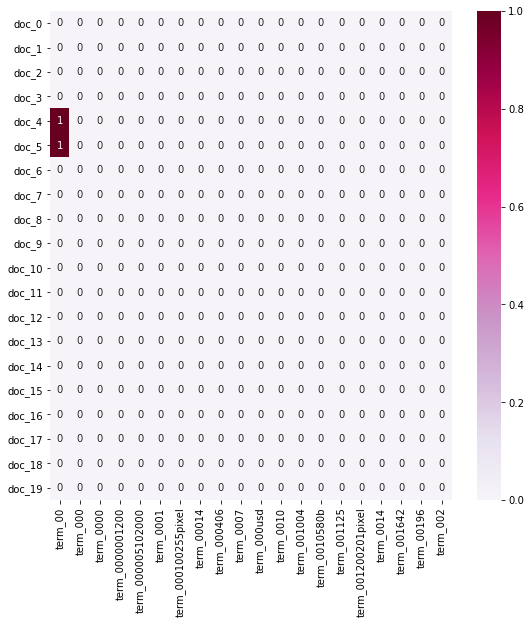

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 9))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Check out more beautiful color palettes here: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/

---

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [58]:
#Since I think it is not possible to present a useful visualization of all the terms in all the documents, I try to get a
#sample with *at least* a predefined least accepted number of terms which have at least a frequency of 1 in any document of
#the sample. For example, if this least_accepted_number_terms = 50, the algorithm below iterates quite some times until it
#randomly finds a sample with the wanted least value.

from sklearn.feature_extraction.text import CountVectorizer

term_counts = 0 
different_sample = 0
sample_size = 100
least_accepted_number_terms = 50
array_size = 40   # The iterated array will be of size: (array_size,array_size)

while term_counts<= least_accepted_number_terms:
    term_counts = 0
    
    X_sample_for_vectorizing = X.sample(sample_size)
    count_vectorizer = CountVectorizer()
    X_sample_counts = count_vectorizer.fit_transform(X_sample_for_vectorizing.text)
    
    different_sample += 1
    
    #Specify an array size  of the vectorized sample (to avoid iterating over all thousands of terms in all rows)
    array = X_sample_counts[:array_size][:array_size].toarray()

    for i in range(array_size):
        for j in range(array_size):
            if(array[i][j] >= 1):
                term_counts = term_counts + 1
                if(term_counts>=least_accepted_number_terms):
                    break

print("The resulting ", array_size, ":",array_size, " matrix has at least",term_counts, "terms with 1 overall in all documents (probably a bit more)")
print(different_sample, " different sample iterations.")  #number of tries in the while loop (to try to get a sample size with at least 60 terms repeated
# at least once in any document)


The resulting  40 : 40  matrix has at least 53 terms with 1 overall in all documents (probably a bit more)
9  different sample iterations.


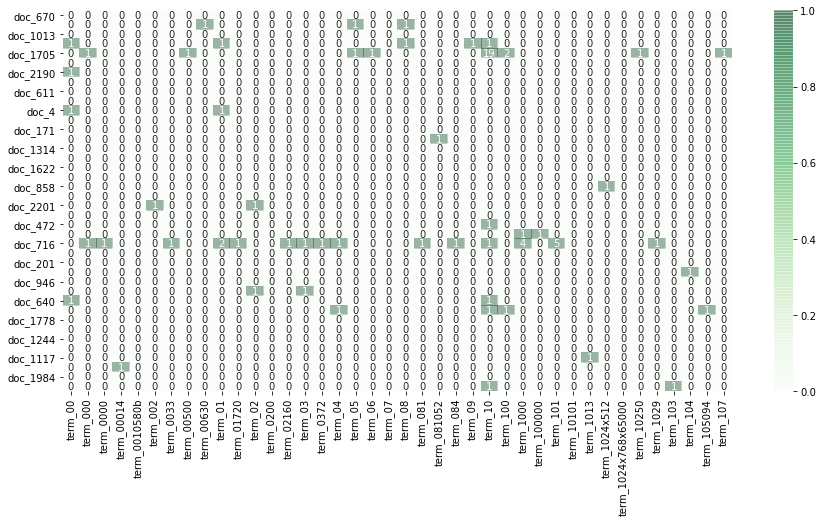

In [59]:
import seaborn as sns

#now we just plot as learned:

plot_x = ["term_"+str(i) for i in count_vectorizer.get_feature_names()[0:array_size]]
plot_y = ["doc_"+ str(i) for i in list(X_sample_for_vectorizing.index)[0:array_size]]
plot_z = X_sample_counts[0:array_size, 0:array_size].toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(15, 7))
ax = sns.heatmap(df_todraw,
                 cmap="Greens", alpha=0.4,
                 vmin=0, vmax=1, annot=True)

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [60]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

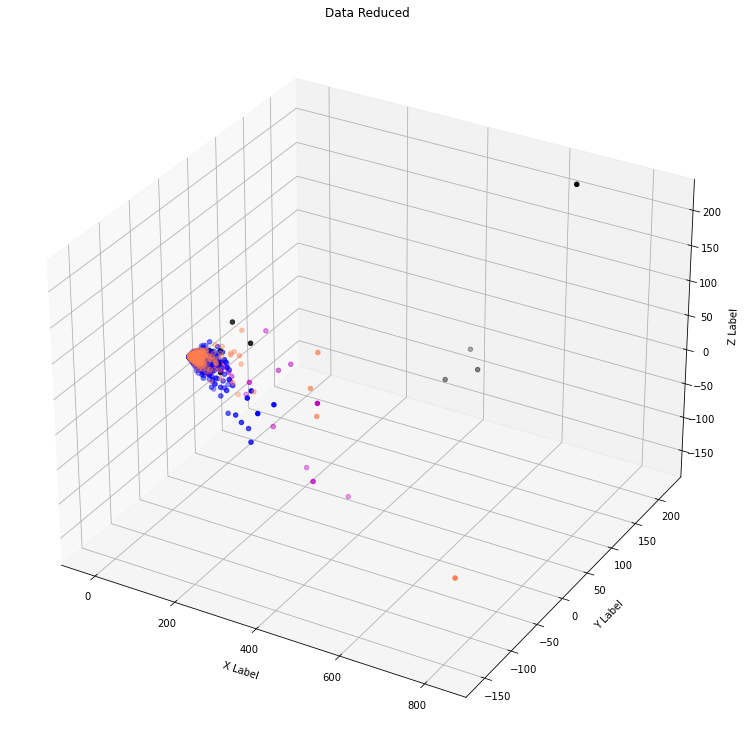

In [62]:
#When we compare the 3D graph to the 2D graph from the class, we can see that a lot of points that "seemed" to be near
#each other now have different "depth" or extra dimensionality on the other dimension, which tells us that they were really
#not that close to begin with. And this happens we we reduce the dimensions, we compromise on the veracity of the graph,
# but still it is a good approximation of how close are the clusters of the points.

from mpl_toolkits.mplot3d import Axes3D

col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
#ax = fig.subplots()
ax = Axes3D(fig)

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]

    ax.scatter(xs, ys, zs,  c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.set_title("Data Reduced")

plt.show()

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [72]:
# Answer here

import numpy as np

term_frequencies = []

#I believe this part is inefficient:

#for j in range(0,500):
#    term_frequencies.append(sum(X_counts[:,j].toarray()))

#We just need this part:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies

array([134,  92,   1, ...,   1,   1,   1], dtype=int64)

In [73]:
import plotly.graph_objects as go

terms = 200

fig = go.Figure(go.Bar(x=count_vect.get_feature_names()[:terms], 
                y=term_frequencies[:terms], showlegend=True, name ='Terms',
                             marker={'color': 'red'}, ))
fig.show()

### >>> **Exercise 14 (take home):** 
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [82]:
# Answer here
term_frequencies = []

#just reduce the numbers of terms in the range, instead of using X_counts.shape[1] which are over 35,000 terms.
terms = 50

# like last time I think this is inefficient:

#for j in range(0,10):
#    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0)[:,:terms])[0]

#Sorting them by descending order (even though in the exercise this is also asked but with the frequencies in the x axis.)
term_frequencies[::-1].sort()

fig2 = go.Figure(go.Bar(x=count_vect.get_feature_names()[:terms], 
            y=term_frequencies[:terms], showlegend=True, marker={'color': 'green'}, name='Terms' ))
fig2.show()

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [88]:
# Answer here
term_frequencies = []
terms = 100

term_frequencies = np.asarray(X_counts.sum(axis=0)[:,:terms])[0]

fig2 = go.Figure(go.Bar(x=term_frequencies[:terms], 
            y=count_vect.get_feature_names()[:terms], name ='By Frequencies',
                        marker={'color': 'green'}, width= 0.75, showlegend=True))
fig2.show()

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [89]:
# Answer here
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
print(mlb.classes_)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:9]

#Yes it also works with category_name!

['alt.atheism' 'comp.graphics' 'sci.med' 'soc.religion.christian']


,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"


# Section 2: New DataSet

Second: follow the same process from the DM2021-Lab1-master Repo on the new dataset. You don't need to explain all details as we did (some minimal comments explaining your code are useful though). This part is worth 30% of your grade.
Download the the new dataset. The dataset contains a sentence and score label. Read the specificiations of the dataset for details.
You are allowed to use and modify the helper functions in the folder of the first lab session (notice they may need modification) or create your own.

In [90]:
#This was done to clean the data from the dataframes, since sometimes in tests extra columns were created,
#so to clean the data and try again i do the following:

df1 = pd.DataFrame(None)
df2 = pd.DataFrame(None)
df3 = pd.DataFrame(None)

df1,df2,df3

(Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [],
 Empty DataFrame
 Columns: []
 Index: [])

In [91]:
#Reading the DataSet from the txt file, and creating a DataFrame with columns Review and Score.

df1 = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header=None, names = ['Review','Score','Category','Category_Name'])
df2 = pd.read_csv('imdb_labelled.txt', sep='\t', header=None, names = ['Review','Score','Category','Category_Name'])
df3 = pd.read_csv('yelp_labelled.txt', sep='\t', header=None, names = ['Review','Score','Category','Category_Name'])

dfs = [df1,df2,df3] #    1 for amazon, 2 for IMDB, 3 for Yelp
category_name =  ['Amazon','IMDB', 'Yelp']

for d,i,c in zip (dfs,range(1,4),category_name):
    d['Category'] = i
    d['Category_Name'] = c

df = pd.concat(dfs, ignore_index=True)
df

,Review,Score,Category,Category_Name
0,So there is no way for me to plug it in here i...,0,1,Amazon
1,"Good case, Excellent value.",1,1,Amazon
2,Great for the jawbone.,1,1,Amazon
3,Tied to charger for conversations lasting more...,0,1,Amazon
4,The mic is great.,1,1,Amazon
...,...,...,...,...
2743,I think food should have flavor and texture an...,0,3,Yelp
2744,Appetite instantly gone.,0,3,Yelp
2745,Overall I was not impressed and would not go b...,0,3,Yelp
2746,"The whole experience was underwhelming, and I ...",0,3,Yelp


## Section 2: 
    Subsection: 3.2 Familiarizing yourself with the Data

In [92]:
df

,Review,Score,Category,Category_Name
0,So there is no way for me to plug it in here i...,0,1,Amazon
1,"Good case, Excellent value.",1,1,Amazon
2,Great for the jawbone.,1,1,Amazon
3,Tied to charger for conversations lasting more...,0,1,Amazon
4,The mic is great.,1,1,Amazon
...,...,...,...,...
2743,I think food should have flavor and texture an...,0,3,Yelp
2744,Appetite instantly gone.,0,3,Yelp
2745,Overall I was not impressed and would not go b...,0,3,Yelp
2746,"The whole experience was underwhelming, and I ...",0,3,Yelp


In [93]:
df[0:10]

,Review,Score,Category,Category_Name
0,So there is no way for me to plug it in here i...,0,1,Amazon
1,"Good case, Excellent value.",1,1,Amazon
2,Great for the jawbone.,1,1,Amazon
3,Tied to charger for conversations lasting more...,0,1,Amazon
4,The mic is great.,1,1,Amazon
5,I have to jiggle the plug to get it to line up...,0,1,Amazon
6,If you have several dozen or several hundred c...,0,1,Amazon
7,If you are Razr owner...you must have this!,1,1,Amazon
8,"Needless to say, I wasted my money.",0,1,Amazon
9,What a waste of money and time!.,0,1,Amazon


In [94]:
df[:-10]

,Review,Score,Category,Category_Name
0,So there is no way for me to plug it in here i...,0,1,Amazon
1,"Good case, Excellent value.",1,1,Amazon
2,Great for the jawbone.,1,1,Amazon
3,Tied to charger for conversations lasting more...,0,1,Amazon
4,The mic is great.,1,1,Amazon
...,...,...,...,...
2733,The problem I have is that they charge $11.99 ...,0,3,Yelp
2734,Shrimp- When I unwrapped it (I live only 1/2 a...,0,3,Yelp
2735,"It lacked flavor, seemed undercooked, and dry.",0,3,Yelp
2736,It really is impressive that the place hasn't ...,0,3,Yelp


In [95]:
df.iloc[::10,0:2][0:10]

,Review,Score
0,So there is no way for me to plug it in here i...,0
10,And the sound quality is great.,1
20,I went on Motorola's website and followed all ...,0
30,"This is a simple little phone to use, but the ...",0
40,"It has a great camera thats 2MP, and the pics ...",1
50,Not loud enough and doesn't turn on like it sh...,0
60,Essentially you can forget Microsoft's tech su...,0
70,Mic Doesn't work.,0
80,I wear it everyday and it holds up very well.,1
90,For a product that costs as much as this one d...,0


In [96]:
df.loc[::10,'Review'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: Review, dtype: object

In [97]:
#Standard Query
df[::10][0:10]

,Review,Score,Category,Category_Name
0,So there is no way for me to plug it in here i...,0,1,Amazon
10,And the sound quality is great.,1,1,Amazon
20,I went on Motorola's website and followed all ...,0,1,Amazon
30,"This is a simple little phone to use, but the ...",0,1,Amazon
40,"It has a great camera thats 2MP, and the pics ...",1,1,Amazon
50,Not loud enough and doesn't turn on like it sh...,0,1,Amazon
60,Essentially you can forget Microsoft's tech su...,0,1,Amazon
70,Mic Doesn't work.,0,1,Amazon
80,I wear it everyday and it holds up very well.,1,1,Amazon
90,For a product that costs as much as this one d...,0,1,Amazon


## Section 2: 
    Subsection: 4. Data Mining using Pandas

In [98]:
df.isnull()

,Review,Score,Category,Category_Name
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
2743,False,False,False,False
2744,False,False,False,False
2745,False,False,False,False
2746,False,False,False,False


In [99]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,Review,Score,Category,Category_Name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [100]:
new_dummy_series = pd.Series(["dummy_record",1], index= ["Review","Category"])
new_dummy_series

Review      dummy_record
Category               1
dtype: object

In [101]:
new_result_with_series = df.append(new_dummy_series, ignore_index = True)
len(new_dummy_series)

2

In [102]:
new_result_with_series

,Review,Score,Category,Category_Name
0,So there is no way for me to plug it in here i...,0.0,1,Amazon
1,"Good case, Excellent value.",1.0,1,Amazon
2,Great for the jawbone.,1.0,1,Amazon
3,Tied to charger for conversations lasting more...,0.0,1,Amazon
4,The mic is great.,1.0,1,Amazon
...,...,...,...,...
2744,Appetite instantly gone.,0.0,3,Yelp
2745,Overall I was not impressed and would not go b...,0.0,3,Yelp
2746,"The whole experience was underwhelming, and I ...",0.0,3,Yelp
2747,"Then, as if I hadn't wasted enough of my life ...",0.0,3,Yelp


In [103]:
new_result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,Review,Score,Category,Category_Name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,1,0,1


In [104]:
#to not affect the original values of 'dummy_dict' and 'result_with_series', and other variables from the Exercises done above
# I used similar named variables for the new dataset.

#I leave Category_Name empty
dummy_dict2 = [{'Review': 'dummy record',
               'Score': 0,
               'Category': 2}]
df= df.append(dummy_dict2, ignore_index = True)
len(df)
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,Review,Score,Category,Category_Name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,1


In [105]:
df.dropna(inplace = True)
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,Review,Score,Category,Category_Name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0,0


In [106]:
len(df)

2748

## Section 2: 
    Subsection: 4.2 Dealing with Duplicate Data

In [107]:
df

,Review,Score,Category,Category_Name
0,So there is no way for me to plug it in here i...,0,1,Amazon
1,"Good case, Excellent value.",1,1,Amazon
2,Great for the jawbone.,1,1,Amazon
3,Tied to charger for conversations lasting more...,0,1,Amazon
4,The mic is great.,1,1,Amazon
...,...,...,...,...
2743,I think food should have flavor and texture an...,0,3,Yelp
2744,Appetite instantly gone.,0,3,Yelp
2745,Overall I was not impressed and would not go b...,0,3,Yelp
2746,"The whole experience was underwhelming, and I ...",0,3,Yelp


In [108]:
df.duplicated()
sum(df.duplicated())

17

In [109]:
sum(df.duplicated('Review'))

#Review column seems to have duplicated values
#I will skip the adding a dummy duplicate, since it has no value here.
#Also because in the exercise in the HW we elminated the duplicated and
#even the original copy. But in this case I do want to keep at least 1
#copy of the duplicated values in 'Review'.

#Also since df.duplicated() returned the same number of duplicates as 
# df.duplicated('Review'), that means that we the duplicates in the column
# 'Review' have the same values in its other columns, so we don't have to
# worry about deciding which duplicated record to keep, since all
#duplicated Reviews have also the same score and category, etc..

17

In [110]:
#But let's check what i said just to be sure:

df[df.duplicated('Review',keep = False)].sort_values('Review',axis=0)

,Review,Score,Category,Category_Name
1590,10/10,1,2,IMDB
1064,10/10,1,2,IMDB
1165,Definitely worth checking out.,1,2,IMDB
1029,Definitely worth checking out.,1,2,IMDB
748,Does not fit.,0,1,Amazon
446,Does not fit.,0,1,Amazon
180,Don't buy this product.,0,1,Amazon
543,Don't buy this product.,0,1,Amazon
402,Excellent product for the price.,1,1,Amazon
892,Excellent product for the price.,1,1,Amazon


In [111]:
#So we have 17 duplicated records. (As you can see above there are 34 records in total
# considering also the 'original' or first copy.) I think its safe to 
# assume each repeated record was done by error. So we will eliminate them.

df.drop_duplicates(keep= "first", inplace = True)

In [112]:
#The resulting dataframe is 2731 records long, which is correct because
# this is 17 records less than the original 2748 records of data.
len(df)

2731

In [113]:
#if we search for duplicates again:
df[df.duplicated('Review',keep = False)].sort_values('Review',axis=0)

#there are none now.

,Review,Score,Category,Category_Name


In [114]:
#Something that stood to my eyes is that the index stayed the same.
df.tail()

#here we can visualize that the last record has an index of 2747, which
#is as the original (it should be 2730, considering it starts with 0).

,Review,Score,Category,Category_Name
2743,I think food should have flavor and texture an...,0,3,Yelp
2744,Appetite instantly gone.,0,3,Yelp
2745,Overall I was not impressed and would not go b...,0,3,Yelp
2746,"The whole experience was underwhelming, and I ...",0,3,Yelp
2747,"Then, as if I hadn't wasted enough of my life ...",0,3,Yelp


In [115]:
df.reset_index(drop=True, inplace=True)
df.tail()
#now its looking better:

,Review,Score,Category,Category_Name
2726,I think food should have flavor and texture an...,0,3,Yelp
2727,Appetite instantly gone.,0,3,Yelp
2728,Overall I was not impressed and would not go b...,0,3,Yelp
2729,"The whole experience was underwhelming, and I ...",0,3,Yelp
2730,"Then, as if I hadn't wasted enough of my life ...",0,3,Yelp


In [116]:
len(df)

2731

## Section 2: 
    Subsection: 5.1 Sampling

In [117]:
df_sample = df.sample(n=1000)
print(len(df_sample))
df_sample[0:4]

1000


,Review,Score,Category,Category_Name
2383,Great food.,1,3,Yelp
583,Also difficult to put on.I'd recommend avoidin...,0,1,Amazon
1980,-Drinks took close to 30 minutes to come out a...,0,3,Yelp
1349,The script is a big flawed mess.,0,2,IMDB


In [118]:
import matplotlib.pyplot as plt
%matplotlib inline

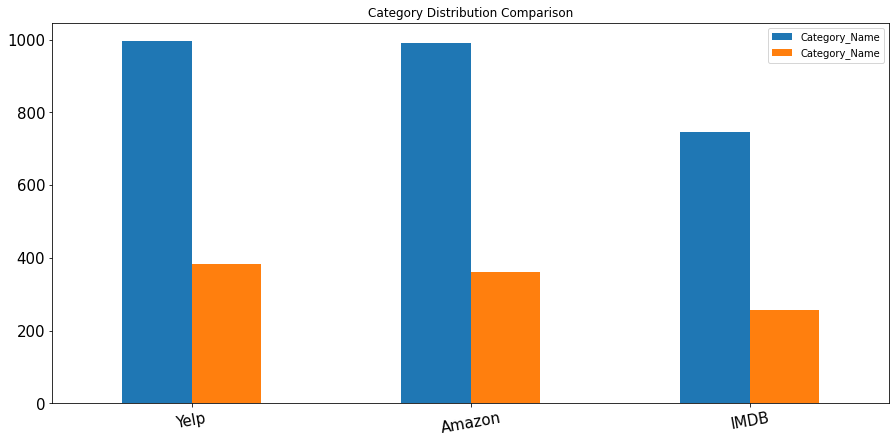

In [119]:
#I skipped making the individual graphs of df and df_sample and just graph them together
# for less noise in having too much lines and graphs:


#Find the upper bounds of boths DataFrames
upper_bound_df = max(df.Category_Name.value_counts()) + 50
upper_bound_df_sample = max(df_sample.Category_Name.value_counts()) + 50
upper_bound = 0

if upper_bound_df > upper_bound_df_sample:
    upper_bound = upper_bound_df
else:
    upper_bound = upper_bound_df_sample

#Concatenate both Dataframes, and plot the result (using the upper bound we found):

combined_df = pd.concat([df.Category_Name.value_counts(),
                                df_sample.Category_Name.value_counts()], axis=1).plot(kind = 'bar',
                                                                                     title = 'Category Distribution Comparison',
                                                                                     ylim = [0, upper_bound],        
                                                                                     rot = 10, fontsize = 15, figsize = (15,7))

## Section 2: 
    Subsection: 5.2 Feature Creation

In [120]:
import nltk
df['unigrams'] = df.Review.apply(lambda x: dmh.tokenize_text(x))
print(df[0:4]['unigrams'])
df[0:4]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object


,Review,Score,Category,Category_Name,unigrams
0,So there is no way for me to plug it in here i...,0,1,Amazon,"[So, there, is, no, way, for, me, to, plug, it..."
1,"Good case, Excellent value.",1,1,Amazon,"[Good, case, ,, Excellent, value, .]"
2,Great for the jawbone.,1,1,Amazon,"[Great, for, the, jawbone, .]"
3,Tied to charger for conversations lasting more...,0,1,Amazon,"[Tied, to, charger, for, conversations, lastin..."


## Section 2: 
    Subsection: 5.3 Feature subset selection

In [121]:
#from sklearn.feature_extraction.text import CountVectorizer      Already imported

count_vectorizer = CountVectorizer()
df_counts = count_vectorizer.fit_transform(df.Review)

In [122]:
new_analyzer = count_vectorizer.build_analyzer()
new_analyzer(str(df.Review[0:1]))

['so',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'name',
 'review',
 'dtype',
 'object']

In [123]:
print(df_counts.shape)
count_vectorizer.get_feature_names()[0:10]


(2731, 5155)


['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']

In [124]:
df_counts[0:10,0:50].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [127]:
#import seaborn as sns   Already imported

#Already explained before (in take home exercise):

term_counts = 0 
different_sample = 0
sample_size = 100 #for sample size
least_accepted_number_terms = 60
array_size = 50


while term_counts<= least_accepted_number_terms:
    term_counts = 0
    
    df_sample_for_vectorizing = df.sample(sample_size)
    count_vectorizer = CountVectorizer()
    df_sample_counts = count_vectorizer.fit_transform(df_sample_for_vectorizing.Review)
    
    different_sample += 1
    
    array = df_sample_counts[:array_size][:array_size].toarray()

    for i in range(array_size):
        for j in range(array_size):
            if(array[i][j] >= 1):
                term_counts = term_counts + 1
                if(term_counts>=least_accepted_number_terms):
                    break

print("The resulting ", array_size, ":",array_size, " matrix has at least",term_counts, "terms with 1 overall in all documents (probably a bit more)")
print(different_sample, " different sample iterations.")  #number of tries in the while loop (to try to get a sample size with at least 60 terms repeated
# at least once in any document)

The resulting  50 : 50  matrix has at least 62 terms with 1 overall in all documents (probably a bit more)
3  different sample iterations.


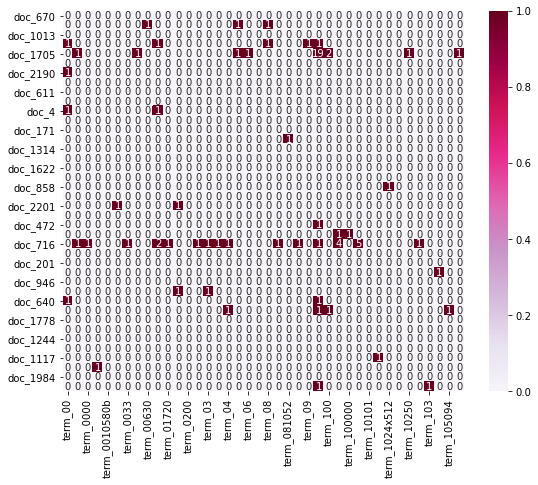

In [128]:
plot_x_2 = ["term_"+str(i) for i in count_vectorizer.get_feature_names()[0:array_size]]
plot_y_2 = ["doc_"+ str(i) for i in list(df.index)[0:array_size]]
plot_z_2 = df_counts[0:array_size, 0:array_size].toarray()

df_todraw2 = pd.DataFrame(plot_z_2, columns = plot_x_2, index = plot_y_2)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

## Section 2: 
    Subsection: 5.4 Dimensionality Reduction

In [129]:
#from sklearn.decomposition import PCA ... Already imported
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
print(df_reduced.shape)

(2731, 2)


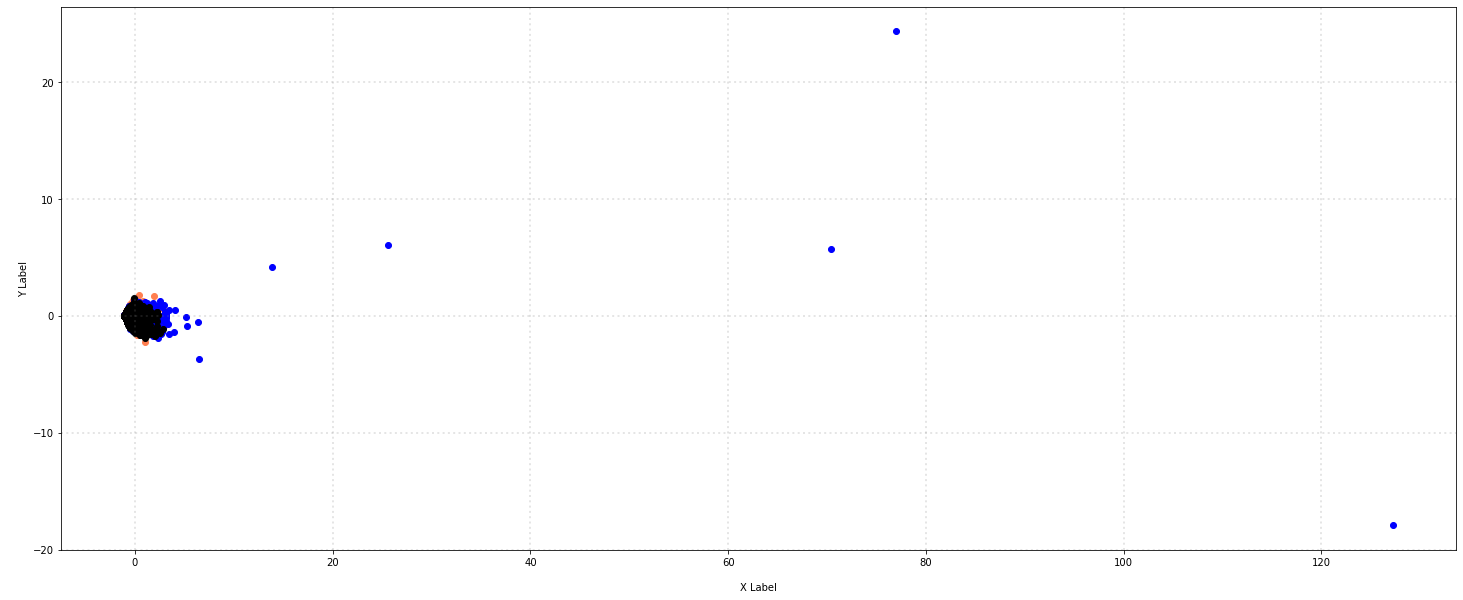

In [130]:
col2 = ['coral', 'blue', 'black']

# plot
fig2 = plt.figure(figsize = (25,10))
ax = fig2.subplots()

for c, category in zip(col2, category_name):
    xs = df_reduced[df['Category_Name'] == category].T[0]
    ys = df_reduced[df['Category_Name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [131]:
#from sklearn.decomposition import PCA Imported already
df_reduced = PCA(n_components = 3).fit_transform(df_counts.toarray())

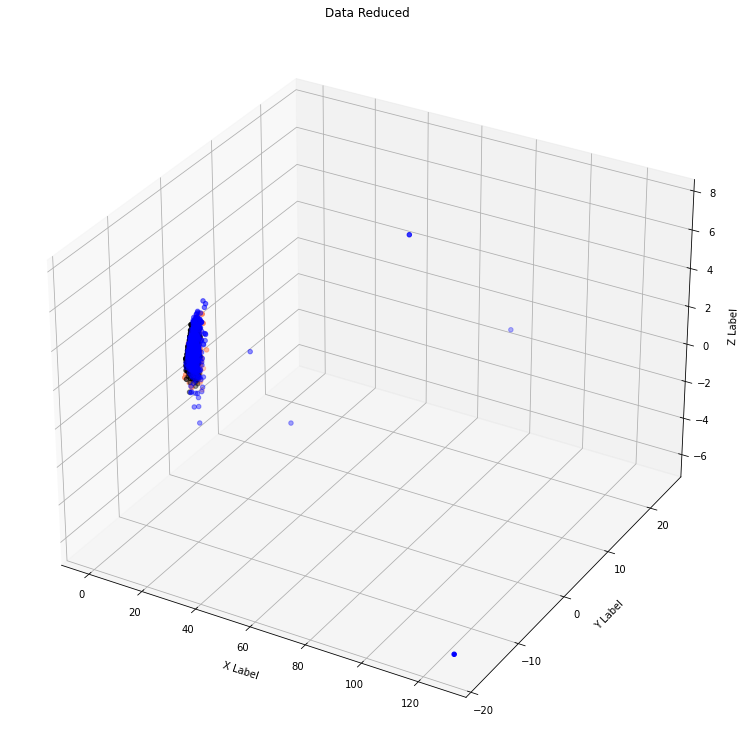

In [132]:
#from mpl_toolkits.mplot3d import Axes3D   Imported already

col2 = ['coral', 'blue', 'black']

# plot
fig2 = plt.figure(figsize = (25,10))
#ax = fig.subplots()
ax2 = Axes3D(fig2)

for c, category in zip(col2, category_name):
    xs = df_reduced[df['Category_Name'] == category].T[0]
    ys = df_reduced[df['Category_Name'] == category].T[1]
    zs = df_reduced[df['Category_Name'] == category].T[2]
   
    #xes3D.scatter(xs, ys, zs=0, zdir='z', s=20, depthshade=True)
    ax2.scatter(xs, ys, zs,  c = c, marker='o')

ax2.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax2.set_xlabel('\nX Label')
ax2.set_ylabel('\nY Label')
ax2.set_zlabel('\nZ Label')
ax2.set_title("Data Reduced")

plt.show()

## Section 2: 
    Subsection: 5.5 Attribute Transformation / Aggregation

In [133]:
new_term_frequencies = []

#This part is inefficient i believe:

#for j in range(0,100):
#    new_term_frequencies.append(sum(df_counts[:,j].toarray()))

#We can just skip it and do the code in the next segment.

In [134]:
new_term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
print(new_term_frequencies[0])
new_term_frequencies

1


array([ 1, 36,  3, ...,  1,  2,  1], dtype=int64)

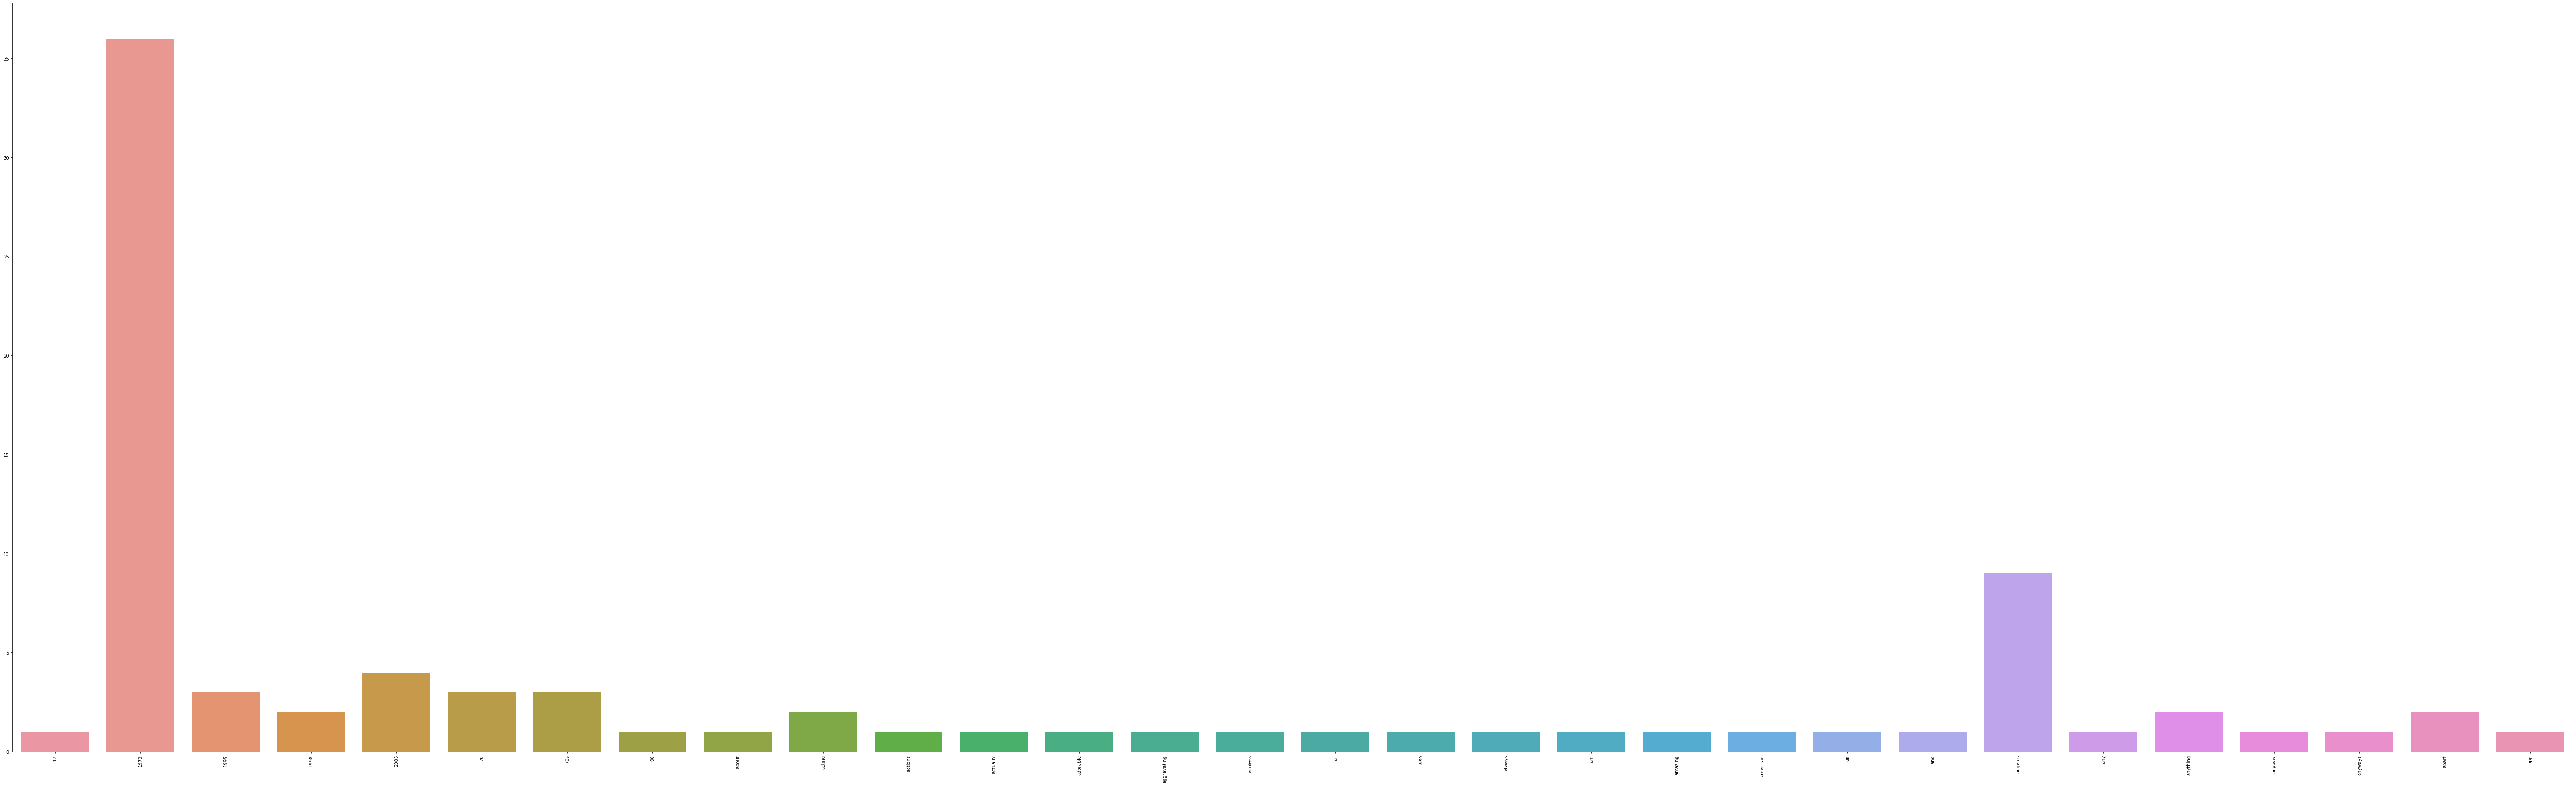

In [135]:
number_terms = 30
plt.subplots(figsize=(100, 30))
g = sns.barplot(x=count_vectorizer.get_feature_names()[:number_terms], 
            y=new_term_frequencies[:number_terms])
g.set_xticklabels(count_vectorizer.get_feature_names()[:number_terms], rotation = 90);

In [136]:
#import plotly.graph_objects as go
fig = go.Figure(go.Bar(x=count_vectorizer.get_feature_names()[:number_terms], 
                y=new_term_frequencies[:number_terms], name='Words', showlegend=True,
                             marker={'color': 'red'}, ))
fig.show()

In [137]:
fig = go.Figure(go.Bar(x=new_term_frequencies[:number_terms], 
                y=count_vectorizer.get_feature_names()[:number_terms], name='Frecuency', showlegend=True,
                             marker={'color': 'red'}, ))
fig.show()

In [138]:
import math
new_term_frequencies = [math.log(i) for i in new_term_frequencies]

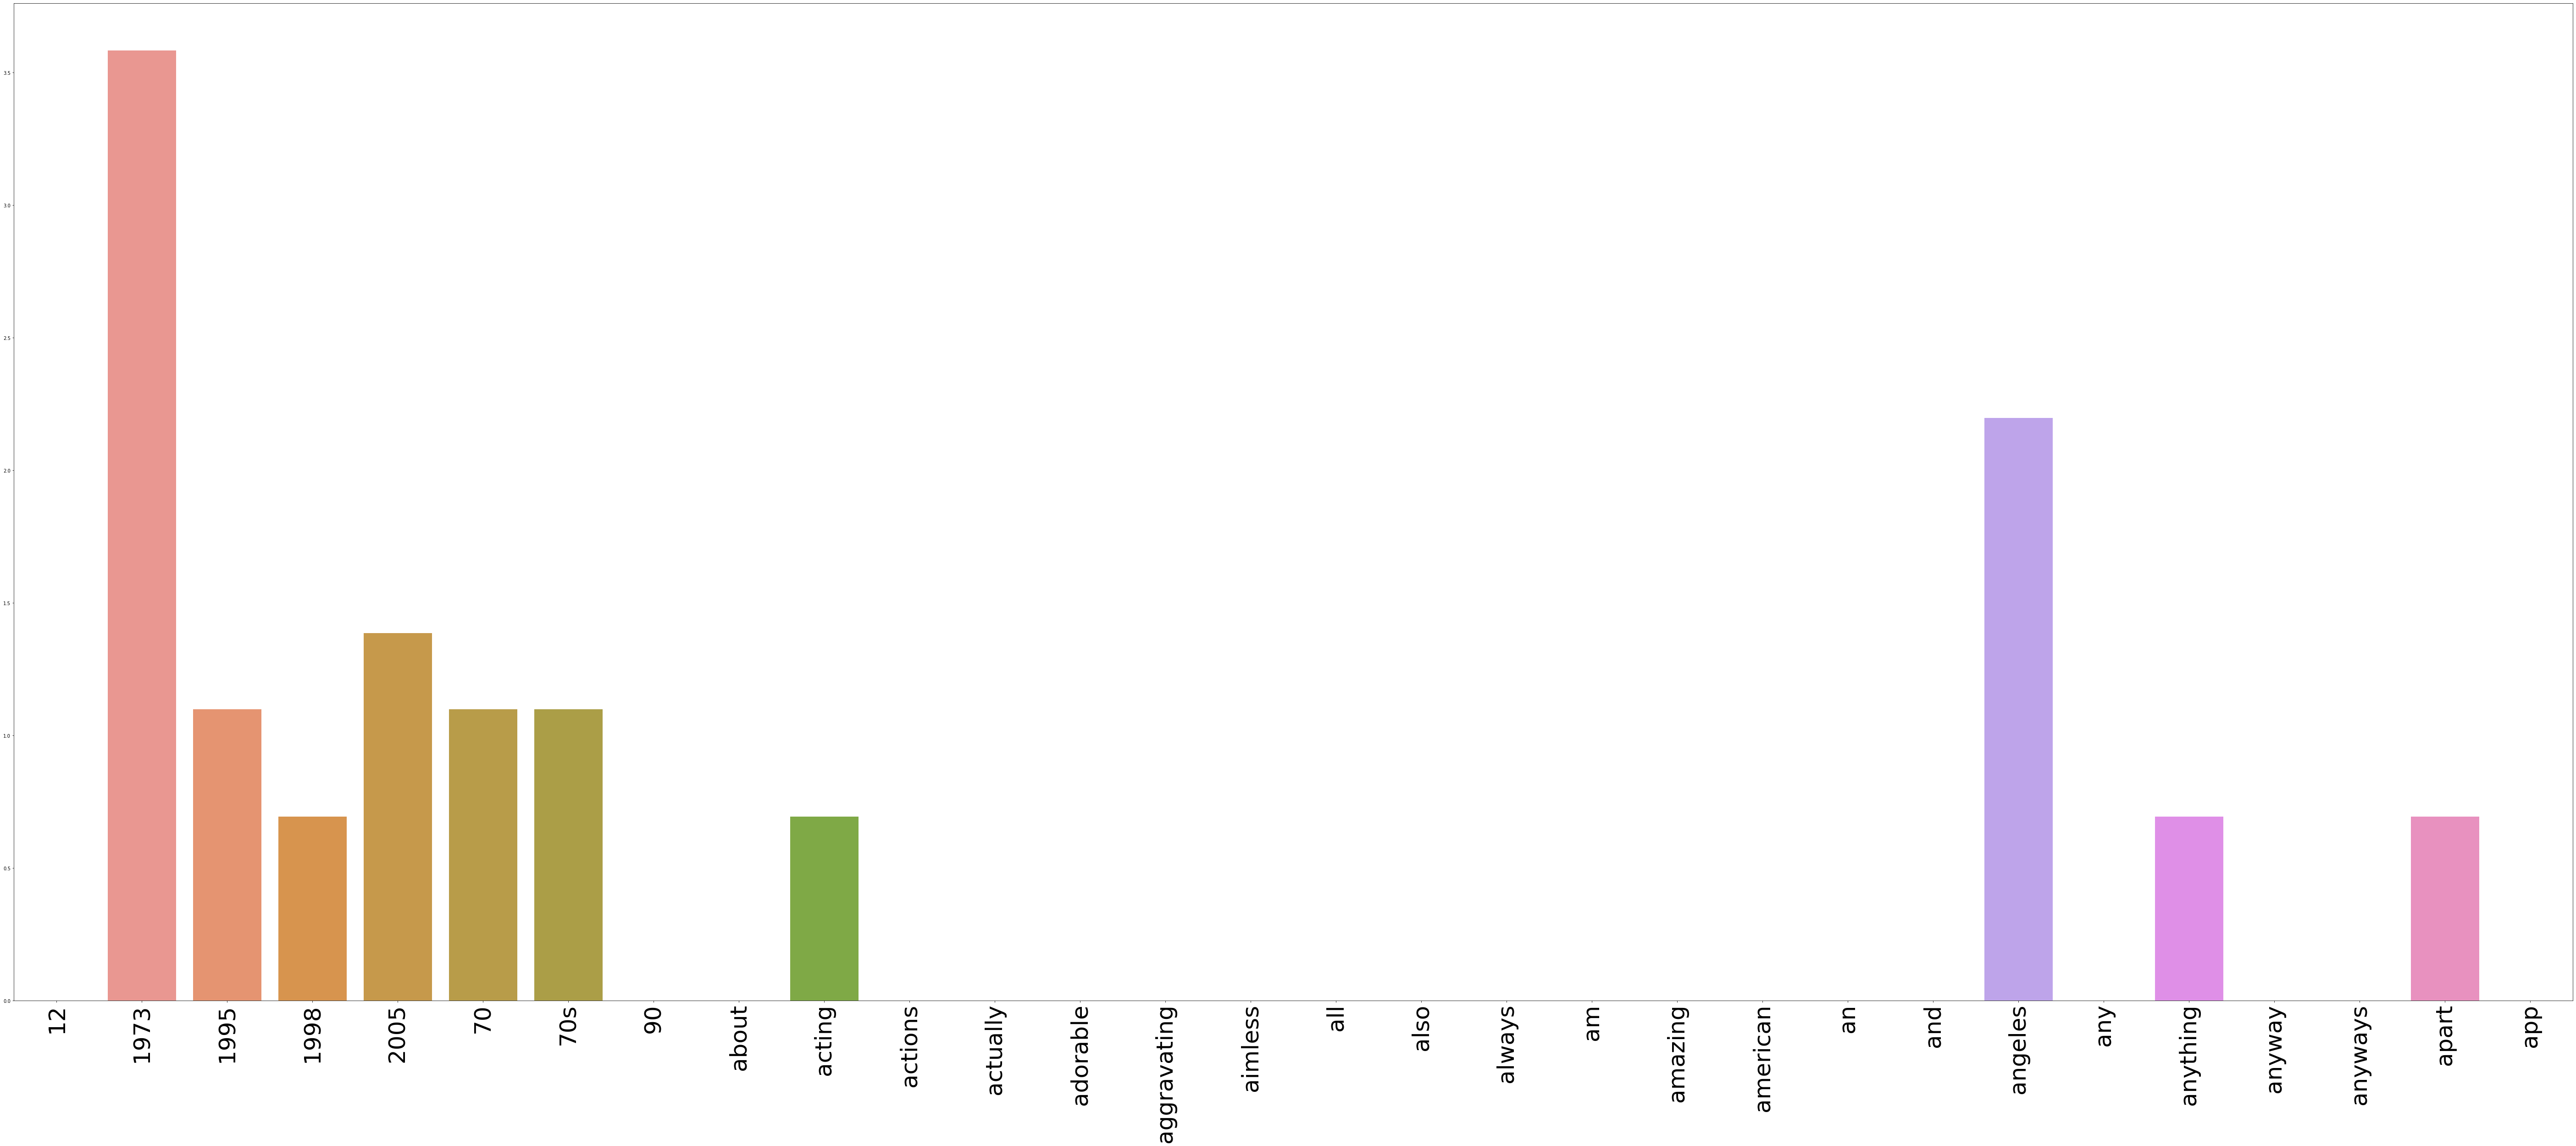

In [139]:
plt.subplots(figsize=(100, 40))
g = sns.barplot(x=count_vectorizer.get_feature_names()[:number_terms],
                y=new_term_frequencies[:number_terms])
g.set_xticklabels(count_vectorizer.get_feature_names()[:number_terms], rotation = 90, fontsize = 50);
#g.set_yticklabels(new_term_frequencies[:number_terms], rotation = 0, fontsize = 50);

## Section 2: 
    Subsection: 5.6 Discretization and Binarization

In [140]:
#from sklearn import preprocessing, metrics, decomposition, pipeline, dummy ..... Already imported for the take away exercises

new_mlb = preprocessing.LabelBinarizer()
new_mlb.fit(df.Category)
new_mlb.classes_

array([1, 2, 3], dtype=int64)

In [141]:
df['bin_category'] = new_mlb.transform(df['Category']).tolist()

In [142]:
df[0:9]

,Review,Score,Category,Category_Name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,1,Amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,1,Amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,1,Amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,1,Amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,1,Amazon,"[The, mic, is, great, .]","[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,1,Amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,1,Amazon,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,1,Amazon,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,1,Amazon,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]"


In [143]:
#Now doing it for "Category_Name"
new_mlb.fit(df.Category_Name)
df['bin_category_name'] = new_mlb.transform(df['Category_Name']).tolist()
df[0:9]

,Review,Score,Category,Category_Name,unigrams,bin_category,bin_category_name
0,So there is no way for me to plug it in here i...,0,1,Amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]","[1, 0, 0]"
1,"Good case, Excellent value.",1,1,Amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]","[1, 0, 0]"
2,Great for the jawbone.,1,1,Amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,1,Amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]","[1, 0, 0]"
4,The mic is great.,1,1,Amazon,"[The, mic, is, great, .]","[1, 0, 0]","[1, 0, 0]"
5,I have to jiggle the plug to get it to line up...,0,1,Amazon,"[I, have, to, jiggle, the, plug, to, get, it, ...","[1, 0, 0]","[1, 0, 0]"
6,If you have several dozen or several hundred c...,0,1,Amazon,"[If, you, have, several, dozen, or, several, h...","[1, 0, 0]","[1, 0, 0]"
7,If you are Razr owner...you must have this!,1,1,Amazon,"[If, you, are, Razr, owner, ..., you, must, ha...","[1, 0, 0]","[1, 0, 0]"
8,"Needless to say, I wasted my money.",0,1,Amazon,"[Needless, to, say, ,, I, wasted, my, money, .]","[1, 0, 0]","[1, 0, 0]"


In [144]:
#Since we do not need to bin_categories that are of the same value,
#I will delete one:

#But first check if the column exists:
if ('bin_category_name' in df):
    #now we delete it if it does exists:
    df = df.drop('bin_category_name',axis=1)
df

,Review,Score,Category,Category_Name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,1,Amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,1,Amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,1,Amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,1,Amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,1,Amazon,"[The, mic, is, great, .]","[1, 0, 0]"
...,...,...,...,...,...,...
2726,I think food should have flavor and texture an...,0,3,Yelp,"[I, think, food, should, have, flavor, and, te...","[0, 0, 1]"
2727,Appetite instantly gone.,0,3,Yelp,"[Appetite, instantly, gone, .]","[0, 0, 1]"
2728,Overall I was not impressed and would not go b...,0,3,Yelp,"[Overall, I, was, not, impressed, and, would, ...","[0, 0, 1]"
2729,"The whole experience was underwhelming, and I ...",0,3,Yelp,"[The, whole, experience, was, underwhelming, ,...","[0, 0, 1]"


## Section 2: 
    Subsection: 6 Data Exploration

In [145]:
#Create the documents with 1 row of Review each at 50 intervals.
document_to_transform_1 = []
document_to_transform_1.append(df.iloc[50]['Review'])

document_to_transform_2 = []
document_to_transform_2.append(df.iloc[100]['Review'])
document_to_transform_2

document_to_transform_3 = []
document_to_transform_3.append(df.iloc[150]['Review'])

documents_to_transform = [document_to_transform_1,document_to_transform_2,document_to_transform_3]

documents_to_transform

[["Not loud enough and doesn't turn on like it should."],
 ['Integrated seamlessly with the Motorola RAZR phone.'],
 ['I Was Hoping for More.']]

In [146]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)


# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

print(document_vector_count_1)

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
  (0, 4992)	1
  (0, 12052)	1
  (0, 13091)	1
  (0, 18551)	1
  (0, 20198)	1
  (0, 20523)	1
  (0, 23250)	1
  (0, 23733)	1
  (0, 29578)	1
  (0, 33078)	1


In [147]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.000000


In [148]:
#There is not 1 word that is the same in any of the 3 new "documents created".
# (which are just a few words long each.)

# Section 3:
    Meaningful New Data Visualizations
    TF-IDF Features
    Naive Bayes Classifier

### Meaningful New Data Visualizations

In [149]:
import numpy as np

#Our current Dataset:
df.head()
#pd.set_option("display.max_rows", None, "display.max_columns", None)    to display all columns
pd.set_option('display.max_rows', 50)

In [150]:
#Dividing the Data Set into 3 different depending of their category:

df_Amazon = df[df['Category_Name']== 'Amazon'].reset_index(drop = True)
df_Yelp = df[df['Category_Name']== 'Yelp'].reset_index(drop = True)
df_IMDB = df[df['Category_Name']== 'IMDB'].reset_index(drop = True)

df_total = df.copy() #The normal dataframe. .copy() helps us to avoid touching the original one.

In [151]:
#The following algorithm assigns a value to 'Positive Similarity' column based on the similarity of words on positive_words
# and if it has at least 1 positive word then 'Positive Similarity' has a value. If the value is greater than 0, then
#I set 'Similarity Rounded' to 1, which is then the column used to train the model (logarithmic regression).

#Overall this has a 67% accuracy over all the dataset (with few words in 'positive_words') to determined correctly
#if the score will be a 0 or 1. Adding more positive words (that are to be found in the files) to the 'positive_words' array will give a better result.

def add_similarity_columns(dataframe):
    
    dataframe['Positive Similarity']  = np.nan
    dataframe['Similarity Rounded']  = np.nan
    positive_words = ['Good good great Excellent excellent loved ideal highly impressed best Best cool Cool Very very perfect Love love enjoy enjoyed nice helpful liked like well ']
    
    #Initialize the CountVectorizer()
    count_vectorizer = CountVectorizer()
    count_vectorizer.fit_transform(df.Review)  #This is to be sure we are using df.Review and not df_sample.Review from previous code
    
    #Document vector for 'positive_words':
    document_vector_count_2 = count_vectorizer.transform(positive_words)
    document_vector_count_2_bin = binarize(document_vector_count_2)
    
    for i in range(0,len(dataframe)):

        #Document vector for each row in 'Review':
        document_to_transform_1 = []
        document_to_transform_1.append(dataframe.iloc[i]['Review'])
        document_vector_count_1 = count_vectorizer.transform(document_to_transform_1)
        document_vector_count_1_bin = binarize(document_vector_count_1)

        #Compare similarity between document1 and document2 and assign the value to 'Positive Similarity':
        similarity = cosine_similarity(document_vector_count_1_bin, document_vector_count_2_bin, dense_output = True)
        dataframe.loc[i, 'Positive Similarity'] = float(similarity)
        
        # If similarity has a value other than 0, it means its probable that it is a good review, so then create a new
        # column with "1" on each cell where similarity has a value (the regression works better with 1 than 0.3, for
        # example):
        if(float(similarity) > 0):
            dataframe.loc[i, 'Similarity Rounded'] = 1
        else:
            dataframe.loc[i, 'Similarity Rounded'] = 0

In [152]:
#Applying the previous function to each dataframe:

add_similarity_columns(df_Amazon)
add_similarity_columns(df_Yelp)
add_similarity_columns(df_IMDB)

add_similarity_columns(df_total)

In [153]:
df_total.head()

,Review,Score,Category,Category_Name,unigrams,bin_category,Positive Similarity,Similarity Rounded
0,So there is no way for me to plug it in here i...,0,1,Amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]",0.000000,0.0
1,"Good case, Excellent value.",1,1,Amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]",0.229416,1.0
2,Great for the jawbone.,1,1,Amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]",0.114708,1.0
3,Tied to charger for conversations lasting more...,0,1,Amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]",0.000000,0.0
4,The mic is great.,1,1,Amazon,"[The, mic, is, great, .]","[1, 0, 0]",0.114708,1.0


In [154]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

#Doing the logarithmic Regression..:

y = df_total['Score']
x1 = df_total[['Similarity Rounded']]

x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
results = reg_log.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.625706
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Score   No. Observations:                 2731
Model:                          Logit   Df Residuals:                     2729
Method:                           MLE   Df Model:                            1
Date:                Wed, 03 Nov 2021   Pseudo R-squ.:                 0.09726
Time:                        16:24:06   Log-Likelihood:                -1708.8
converged:                       True   LL-Null:                       -1892.9
Covariance Type:            nonrobust   LLR p-value:                 4.614e-82
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.5314      0.049    -10.777      0.000      -0.628      -0.435
Similarity Rounded     1.6177      0.089     18.185      0.000       1.443       1.792
======================================================================================
"""

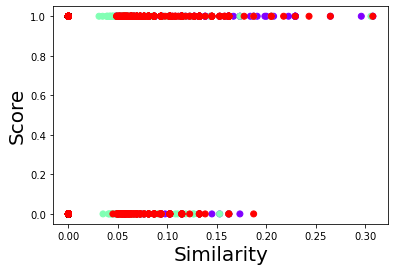

In [155]:
#Plotting the regression (based on (df_total)) and 'clustering' it based on 'Category'

plt.scatter(df_total['Positive Similarity'], y, c = df_total['Category'], cmap = 'rainbow')
plt.xlabel('Similarity', fontsize = 20)
plt.ylabel('Score', fontsize = 20)
plt.show()

In [156]:
# results.pred_table() gives us the Confusion Matrix of the regression, but unformatted, so let's put it in a dataframe:
cm_df = pd.DataFrame(results.pred_table(),columns = ['Predicted 0', 'Predicted 1'])
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predicted 0,Predicted 1
Actual 0,1111.0,244.0
Actual 1,653.0,723.0


In [157]:
cm = np.array(cm_df)
accuracy_train = ((cm[0,0]+ cm[1,1])/cm.sum())
print("Accuracy of the logarithmic regression on the Dataframe is: ", round((accuracy_train*100),3),"%")

Accuracy of the logarithmic regression on the Dataframe is:  67.155 %


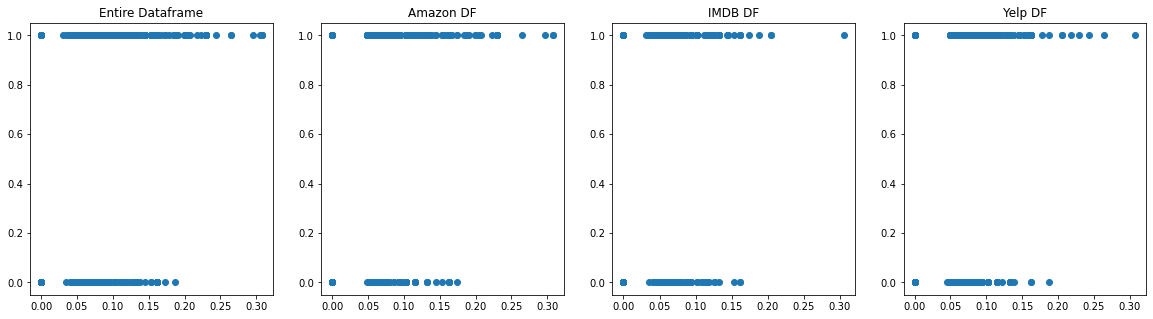

In [158]:
figure, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize = (20,5))

ax1.scatter(df_total['Positive Similarity'], df_total['Score'])
ax1.set_title("Entire Dataframe")

ax2.scatter(df_Amazon['Positive Similarity'], df_Amazon['Score'])
ax2.set_title("Amazon DF")

ax3.scatter(df_IMDB['Positive Similarity'], df_IMDB['Score'])
ax3.set_title("IMDB DF")

ax4.scatter(df_Yelp['Positive Similarity'], df_Yelp['Score'])
ax4.set_title("Yelp DF")

#df_total.plot(kind='scatter', x = 'Positive Similarity', y = ['Score'])

plt.show()

#Logarithmic plots of each dataframe:

In [159]:
# As we can see it's still not so clear that the added features helps us a lot to predict whether or not we will get a
# 1 as a score. This is because many sentences contain words that don't necessarily connotate a positive expression, but
# it is all the expression itself which gives a positive outcome, e.g.: I tried the Cape Cod ravoli, chicken,with cranberry...mmmm!
# and adding more and more words like mmmm!, would defeat the purpose. With few words we got almost a 70% accuracy which is
# not so bad!

### TF-IDF Features
Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .

In [160]:
df.head()

,Review,Score,Category,Category_Name,unigrams,bin_category
0,So there is no way for me to plug it in here i...,0,1,Amazon,"[So, there, is, no, way, for, me, to, plug, it...","[1, 0, 0]"
1,"Good case, Excellent value.",1,1,Amazon,"[Good, case, ,, Excellent, value, .]","[1, 0, 0]"
2,Great for the jawbone.,1,1,Amazon,"[Great, for, the, jawbone, .]","[1, 0, 0]"
3,Tied to charger for conversations lasting more...,0,1,Amazon,"[Tied, to, charger, for, conversations, lastin...","[1, 0, 0]"
4,The mic is great.,1,1,Amazon,"[The, mic, is, great, .]","[1, 0, 0]"


In [198]:
from sklearn.feature_extraction.text import TfidfVectorizer

#Here we get the TF_IDF for the first 100 features:
number_features = 100

tfidf_vectorizer = TfidfVectorizer(
                            lowercase=True,
                            max_features= number_features, #this gets the 100 (in this case) top or more important features
                            max_df=0.8,
                            #min_df=5,
                            #ngram_range = (1,3),
                            stop_words = "english"
                            )

vectors = tfidf_vectorizer.fit_transform(df['Review'][:])
feature_names = tfidf_vectorizer.get_feature_names()

#dense = vectors.todense()
#denselist = dense.tolist()
df_TFIDF = pd.DataFrame(vectors.toarray(), columns=feature_names)


df_TFIDF

,10,acting,amazing,bad,battery,best,better,came,camera,case,...,watching,way,went,won,wonderful,work,works,worst,worth,years
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.661586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2726,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2727,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2729,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [199]:
# Here i sum TF_IDF of each word in each row or sentence added, to then get the average of all TF_IDF (importance) words in the whole document
# for the number of features (top max_features) we specified before.

word_values = np.asarray(vectors.sum(axis=0)/number_features)[0]
df_word_values = pd.DataFrame([word_values], columns = feature_names[0:number_features])
df_word_values

#Average TF_IDF:
#I perform the average, since it is not possible to graph the whole matrix.

,10,acting,amazing,bad,battery,best,better,came,camera,case,...,watching,way,went,won,wonderful,work,works,worst,worth,years
0,0.192294,0.236169,0.223691,0.559322,0.309622,0.472722,0.319448,0.211841,0.151431,0.229764,...,0.116071,0.292183,0.167166,0.183192,0.172328,0.32005,0.354307,0.271153,0.177423,0.12547


In [200]:
# Graph the features by their added TF_IDF per sentence, by their word importance and not by their frequency:

fig = go.Figure(go.Bar(x=feature_names[:number_features], 
                y=word_values, name='Words', showlegend=True,
                             marker={'color': 'red'}),
               layout=go.Layout(title=go.layout.Title(text="TD_IDF Graph of 'Review'")
                ))
fig.update_xaxes(title_text="Top Max Features/Words")
fig.update_yaxes(title_text="(average) TF_IDF")
fig.show()

### Naive Bayes Classifier

#### Naive Bayes with Count Vectorizer (word frequency feature counter)

In [230]:
df.tail()

,Review,Score,Category,Category_Name,unigrams,bin_category
2726,I think food should have flavor and texture an...,0,3,Yelp,"[I, think, food, should, have, flavor, and, te...","[0, 0, 1]"
2727,Appetite instantly gone.,0,3,Yelp,"[Appetite, instantly, gone, .]","[0, 0, 1]"
2728,Overall I was not impressed and would not go b...,0,3,Yelp,"[Overall, I, was, not, impressed, and, would, ...","[0, 0, 1]"
2729,"The whole experience was underwhelming, and I ...",0,3,Yelp,"[The, whole, experience, was, underwhelming, ,...","[0, 0, 1]"
2730,"Then, as if I hadn't wasted enough of my life ...",0,3,Yelp,"[Then, ,, as, if, I, had, n't, wasted, enough,...","[0, 0, 1]"


In [231]:
#Using CountVectorizer for the first Naive Classifier
vectorizer = CountVectorizer(stop_words = 'english')
vectorizer_counts = vectorizer.fit_transform(df.Review)
vectorizer_counts.shape

(2731, 4896)

In [232]:
#Dividing the dataframe into a train and a test sections
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(vectorizer_counts,df.Score,
                                                test_size=0.2, random_state = 42)

In [234]:
#Performing the actual Naive Classifier:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
naive_classifier = MultinomialNB()
naive_classifier.fit(x_train, y_train)

MultinomialNB()

In [264]:
#Short DataFrame of visualizations of how many correct and incorrect the classifier got:

#Make the predicitions with the test data
predictions = naive_classifier.predict(x_test)

#Establish how many correct, incorrect predictions, and accuracy:
correct_predictions = (y_test == predictions).sum()
incorrect_predictions = y_test.size - correct_predictions
accuracy = round((naive_classifier.score(x_test,y_test))*100,2)

results_naive = correct_predictions, incorrect_predictions, accuracy

df_results = pd.DataFrame([results_naive], columns = ['Correct','Incorrect', 'Accuracy %'])
df_results

,Correct,Incorrect,Accuracy %
0,430,117,78.61


The accuracy for this Naive Classifier (with CountVectorizer) is:  78.61 %


,Predicted 0,Predicted 1
Actual 0,208,62
Actual 1,55,222


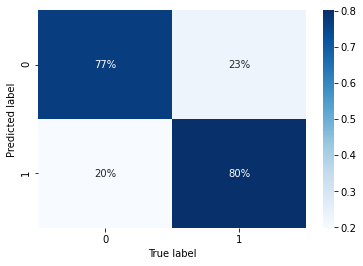

In [289]:
from sklearn.metrics import confusion_matrix,accuracy_score

#Another way to perform the accuracy:
ac = accuracy_score(y_test,predictions)
print('The accuracy for this Naive Classifier (with CountVectorizer) is: ', round((ac *100),2), '%' )

#Plot the confusion matrix (heatmap) with %s
conf_mat = confusion_matrix(y_test, predictions, normalize="true") #with normalizing the ("true") rows, to get %s.
sns.heatmap(conf_mat, annot=True, fmt=".0%", cmap="Blues")
plt.xlabel("True label")
plt.ylabel("Predicted label")

#Plot Confusion Matrix Dataframe with actual numbers
cm = confusion_matrix(y_test, predictions) #without normalizing the ("true") rows, to get actual counts
cm_df = pd.DataFrame(cm ,columns = ['Predicted 0', 'Predicted 1'])
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

In [240]:
#Try to predict new sentences's scores:

examples = ['Excellent place.',   #Should be 1
            'Horrible food.',     #Should be 0
            'Bad performances all around.',  #Should be 0
            '10/10 would definitely come again', #Should be 1
            'This is the worst product i have bought this month.',  #Should be 0
            'I was surprised with the quality.', #Should be 1
            'The price was not reasonable at all.' #Should be 0
           ]

doc_term_matrix = vectorizer.transform(examples)
naive_classifier.predict(doc_term_matrix)

#In the small new added tests, we got all correct but the last one.

array([1, 0, 0, 1, 0, 1, 1], dtype=int64)

#### Naive Bayes with TF_IDF

In [243]:
#Now the same procedure without CounterVectorizer but with TF_IDF vectorizer:

tfidf_vectorizer = TfidfVectorizer(
                            lowercase=True,
                            #max_features= number_features,
                            max_df=0.8,
                            stop_words = "english"
                            )

vectors_tfidf_counts = tfidf_vectorizer.fit_transform(df['Review'][:])

In [263]:
#Train and test datasets (from the original dataset) to perform evaluations:
#Used the same variables as before, but with a "2" (2nd classifier) to leave the other Naive Bayes variables unaffected:

x_train2,x_test2,y_train2,y_test2 = train_test_split(vectors_tfidf_counts,df.Score,
                                                    test_size=0.2, random_state = 42)

In [247]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
#The naive Classifier:

naive_classifier2 = MultinomialNB()
naive_classifier2.fit(x_train2, y_train2)

MultinomialNB()

In [248]:
#Short DataFrame of visualizations of how many correct and incorrect the classifier got:

#Make the predicitions (with TF_IDF features) with the test data
predictions2 = naive_classifier2.predict(x_test2)

#Establish how many correct, incorrect predictions, and accuracy:
correct_predictions2 = (y_test2 == predictions2).sum()
incorrect_predictions2 = y_test2.size - correct_predictions2
accuracy2 = round((naive_classifier2.score(x_test2,y_test2))*100,2)

results_naive_tf_idf = correct_predictions2, incorrect_predictions2, accuracy2

df_results_tf_idf = pd.DataFrame([results_naive_tf_idf], columns = ['Correct','Incorrect', 'Accuracy %'])
df_results_tf_idf

,Correct,Incorrect,Accuracy %
0,443,104,80.99


The accuracy for this Naive Classifier (with TF_IDF) is:  80.99 %


,Predicted 0,Predicted 1
Actual 0,216,54
Actual 1,50,227


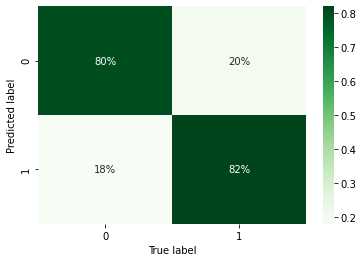

In [287]:
#Another way to perform the accuracy:
ac2 = accuracy_score(y_test2,predictions2)
print('The accuracy for this Naive Classifier (with TF_IDF) is: ', round((ac2 *100),2), '%' )

#Plot the confusion matrix (heatmap) with %s
conf_mat2 = confusion_matrix(y_test2, predictions2, normalize="true") #with normalizing the ("true") rows, to get %s.
sns.heatmap(conf_mat2, annot=True, fmt=".0%", cmap="Greens")
plt.xlabel("True label")
plt.ylabel("Predicted label")

#Plot the DataFrame confusion matrix with actual correct/incorrect values
cm2 = confusion_matrix(y_test2, predictions2) #without normalizing the ("true") rows, to get actual counts
cm_df2 = pd.DataFrame(cm2,columns = ['Predicted 0', 'Predicted 1'])
cm_df2 = cm_df2.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df2

In [118]:
#The TF_IDF approach was a bit more accurate than the word count approach. This example values more the uniqueness or
#strength of the word, that the times it appears on the documents/sentences.

In [119]:
examples = ['Excellent place.',   #Should be 1
            'Horrible food.',     #Should be 0
            'Bad performances all around.',  #Should be 0
            '10/10 would definitely come again', #Should be 1
            'This is the worst product i have bought this month.',  #Should be 0
            'I was surprised with the quality.', #Should be 1
            'The price was not reasonable at all.' #Should be 0
           ]

doc_term_matrix2 = tfidf_vectorizer.transform(examples)
naive_classifier2.predict(doc_term_matrix2)

#With the same examples as the previous classifier, we got the same 6 corrects and the last one incorrect.

array([1, 0, 0, 1, 0, 1, 1], dtype=int64)